Logo Detection using Template Matching and Feature Matching 

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/All_Logo.png",cv2.IMREAD_GRAYSCALE)
template_img = img[830:1110,420:600]
img3 = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/All_Logo.png",cv2.IMREAD_COLOR)

In [10]:
cv2.imshow("original",img)
cv2.imshow("template", template_img)
cv2.imshow("template", img3)


cv2.waitKey(0)
cv2.destroyAllWindows()

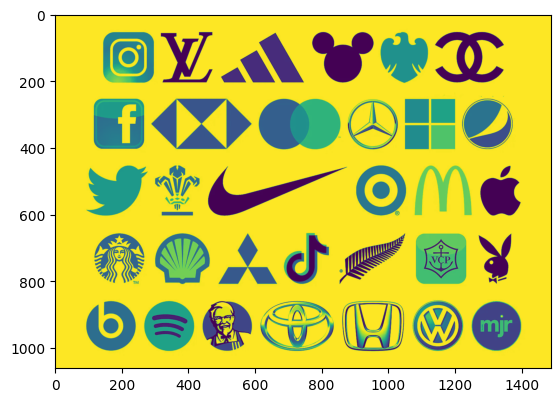

In [11]:
plt.imshow(img)

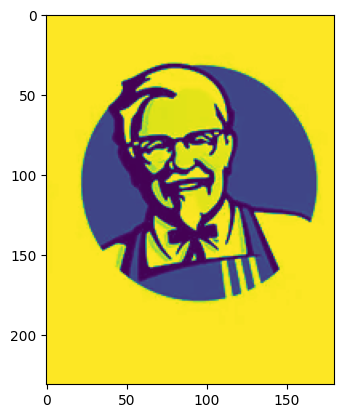

In [12]:
plt.imshow(img[830:1110,420:600])

In [13]:
h,w = template_img.shape

In [14]:
matchmethods =[cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

In OpenCV, cv2.TM_CCOEFF etc. are constants.
https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html 
A constant in Python is just a variable bound to a number.

OpenCV defines them in C++ and exposes them to Python as integers.

Internally:

cv2.TM_SQDIFF          == 0
cv2.TM_SQDIFF_NORMED   == 1
cv2.TM_CCORR           == 2
cv2.TM_CCORR_NORMED    == 3
cv2.TM_CCOEFF          == 4
cv2.TM_CCOEFF_NORMED   == 5


So when you print(matchmethods), Python shows their integer values, because Python doesn’t remember the “name” you used to refer to them — only the value.

In [15]:
print(matchmethods)

[4, 5, 2, 3, 0, 1]


Trying each method one by one.
cv2.matchTemplate returns an array, 
size of the output array equired.

4x4 image with 2x2 template
(4-2)+1, (4-2)+1 = 3,3

[[0  ,255,255,0  ]
 [255,255,255,255]         [[255,255]
 [255,255,255,255]          [255,255]]
 [0  ,255,255,0  ]]

original                   template 

[[|0  ,255|,0  ,0  ]
 [|255,255|,0  ,0  ]         [255,255]
 [ 0  , 0  ,0  ,0  ]         [255,255]
 [ 0  ,255,255,0   ]]

match[0, ]

[[0  ,|255,255|  ,0  ]
 [255,|255,255|  ,255]         [255,255]
 [255, 255,255  ,255]         [255,255]
 [0  , 255,255,  0 ]]

match [0,1]

[[0  , 255,|255  ,0  |]
 [255, 255,|255  ,255|]         [255,255]
 [255, 255,255  ,255]         [255,255]
 [0  , 255,255,0   ]]
match [0,1,0]

and so on ...
will result in

match [[0,1,0]
       [1,1,1]
       [0,1,0]]
 which is (3x3)

In [16]:
print(img.shape)
print(template_img.shape)
print(1061-231+1)
print(1488-180+1)


(1061, 1488)
(231, 180)
831
1309


In [17]:
# check for math array shape
for method in matchmethods:
    img2 = img.copy() #rectangle drawn on img2, (img without rect)
    result = cv2.matchTemplate(img2,template_img, method) #result is (W-w)+1, (H-h)+1 

print("match array shape", result.shape)

match array shape (831, 1309)


In [18]:
#for all 6 methods

for method in matchmethods:
    img2 = img.copy() #rectangle drawn on img2, (img without rect)
    result = cv2.matchTemplate(img2,template_img, method) #result is (W-w)+1, (H-h)+1 
    
    min_v, max_v, min_loc, max_loc = cv2.minMaxLoc(result) #depending on method min or max matches
    print(min_loc, max_loc)


(476, 357) (420, 830)
(488, 343) (420, 830)
(528, 131) (722, 404)
(525, 132) (420, 830)
(420, 830) (467, 361)
(420, 830) (526, 132)


In [19]:
# cv2.imshow("result",result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [20]:
result = cv2.matchTemplate(img2,template_img, cv2.TM_SQDIFF) 
result.shape

(831, 1309)

In [21]:
print(matchmethods)

[4, 5, 2, 3, 0, 1]


In [22]:
cv2.imshow("result",img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
for method in matchmethods:
    print(method)
    img4 = img3.copy() #all rectangle should not be over drawn on same image hence copy 
    result = cv2.matchTemplate(img,template_img, method) #result is (W-w)+1, (H-h)+1 
    
    
    min_v, max_v, min_loc, max_loc = cv2.minMaxLoc(result) #depending on method min or max matches
    print(min_loc, max_loc)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        (x1,y1) = min_loc
    else:
        (x1,y1) = max_loc
    # cv2.rectangle(img2, loc, )
    print("loc ",(x1,y1))
    (x2, y2) = (x1+w, y1+h) # to draw rectangle bottom right x2, y2 coord
    cv2.rectangle(img4, (x1, y1), (x2,y2), (0,255,0), 5)
    cv2.imshow(str(method),img4)
    cv2.imwrite(str(method)+"Logo_template.jpg",img4)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

4
(476, 357) (420, 830)
loc  (420, 830)
5
(488, 343) (420, 830)
loc  (420, 830)
2
(528, 131) (722, 404)
loc  (722, 404)
3
(525, 132) (420, 830)
loc  (420, 830)
0
(420, 830) (467, 361)
loc  (420, 830)
1
(420, 830) (526, 132)
loc  (420, 830)


| Method             | Match best at                         | Fail when              | Min/Max best match |
| ------------------ | ------------------------------------- | ---------------------- | ------------------ |
| TM\_CCOEFF         | Lighting varies but shape remains     | Low contrast, rotation | Max value          |
| TM\_CCOEFF\_NORMED | Lighting + contrast vary              | Noise dominates        | Max value          |
| TM\_CCORR          | Lighting fixed                        | Lighting changes       | Max value          |
| TM\_CCORR\_NORMED  | Lighting fixed, need score comparison | Lighting changes       | Max value          |
| TM\_SQDIFF         | Exact pixel match                     | Any lighting change    | Min value          |
| TM\_SQDIFF\_NORMED | Exact match + score comparison        | Lighting change        | Min value          |


Use CCOEFF or CCOEFF_NORMED if lighting might change.

Use CCORR if lighting is fixed.

Use SQDIFF only if the template and target image are exactly the same.

Feature Matching

In [3]:
lays_logo = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/LaysLogo.png",cv2.IMREAD_GRAYSCALE) #template
lays_packet = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/layspacket.jpg", cv2.IMREAD_GRAYSCALE)
# lays_bgr = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/LaysLogo.png",cv2.IMREAD_COLOR)


In [4]:
cv2.imshow("original",lays_logo)
cv2.imshow("template", lays_packet)
# cv2.imshow("clr", lays_bgr)


cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


In [5]:
orb_detector =cv2.ORB_create()
kp1, desc1= orb_detector.detectAndCompute(lays_packet, None)
kp2, desc2 =orb_detector.detectAndCompute(lays_logo, None) 

In [6]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) # type: ignore
matches = bf.match(desc1, desc2)
matches = sorted(matches, key = lambda x:x.distance)

matching_result = cv2.drawMatches(lays_packet, kp1, lays_logo, kp2, matches[:9],None)
print(len(matches))
cv2.imshow("matched results ",matching_result)
cv2.imwrite("feature_lays.jpg", matching_result)
cv2.waitKey(0)
cv2.destroyAllWindows()


67


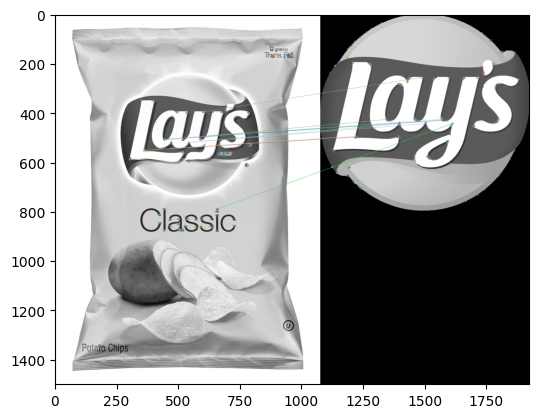

In [7]:
plt.imshow(matching_result)